# TODO
- Features reduction
- Différents test de performances

In [37]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

On charge les données d'entraînement avec le fichier train.csv

In [3]:
data_app_train = pd.read_csv("./train.csv")
data_app_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


On vérifie si les classes sont bien répartit pour éviter les problèmes reliés à la non homogénéité des classes

In [4]:
data_app_train["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [5]:
data_app_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
data_app_train.groupby("price_range").mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


Text(0.5, 1.0, 'Largeur du téléphone')

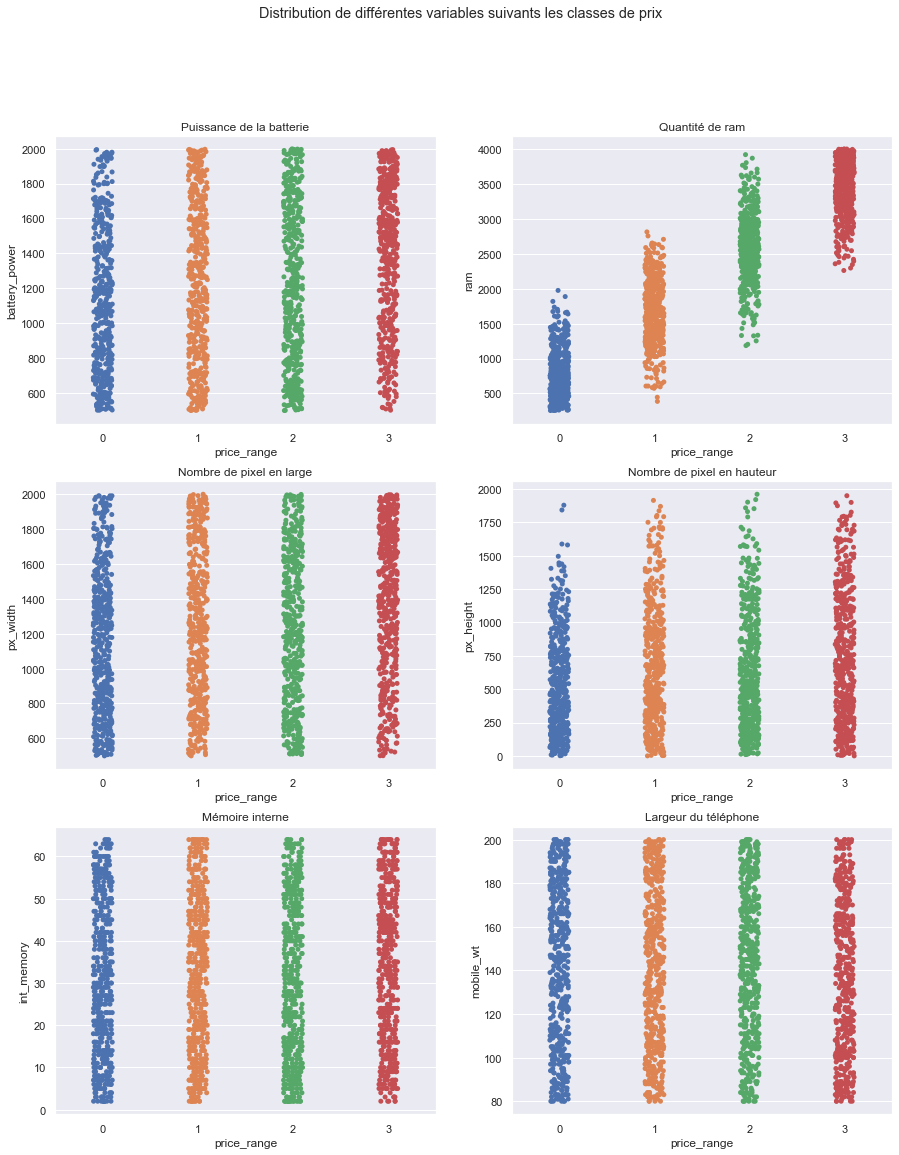

In [7]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribution de différentes variables suivants les classes de prix')

sns.stripplot(ax=axes[0, 0],data=data_app_train ,x='price_range', y='battery_power')
axes[0,0].set_title('Puissance de la batterie')

sns.stripplot(ax=axes[0, 1],data=data_app_train ,x='price_range', y='ram')
axes[0,1].set_title('Quantité de ram')

sns.stripplot(ax=axes[1,0],data=data_app_train ,x='price_range', y='px_width')
axes[1,0].set_title('Nombre de pixel en large')

sns.stripplot(ax=axes[1,1],data=data_app_train ,x='price_range', y='px_height')
axes[1,1].set_title('Nombre de pixel en hauteur')

sns.stripplot(ax=axes[2, 0],data=data_app_train ,x='price_range', y='int_memory')
axes[2,0].set_title('Mémoire interne')

sns.stripplot(ax=axes[2, 1],data=data_app_train ,x='price_range', y='mobile_wt')
axes[2, 1].set_title('Largeur du téléphone')

Text(0.5, 1.0, "Hauteur de l'écran")

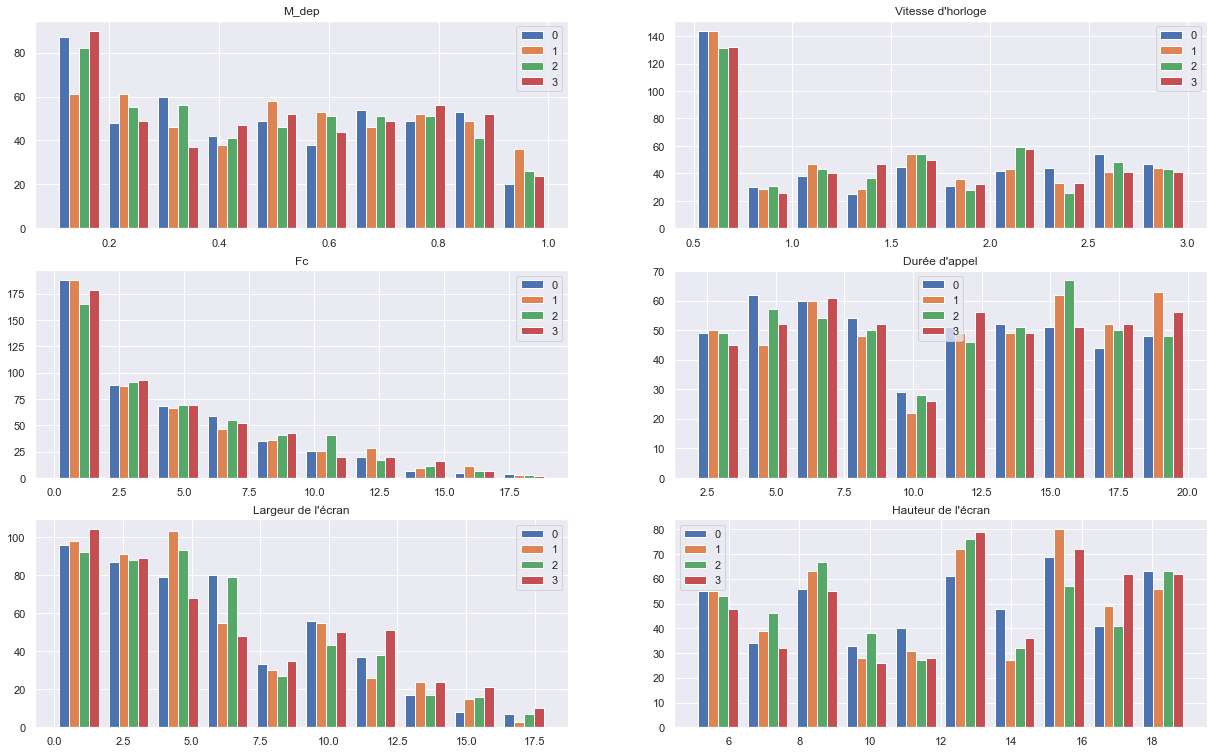

In [8]:
plt.figure(figsize=(21,13))
plt.subplot(3,2,1)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["m_dep"],
    data_app_train[data_app_train["price_range"]==1]["m_dep"],
    data_app_train[data_app_train["price_range"]==2]["m_dep"],
    data_app_train[data_app_train["price_range"]==3]["m_dep"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("M_dep")
plt.subplot(3,2,2)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["clock_speed"],
    data_app_train[data_app_train["price_range"]==1]["clock_speed"],
    data_app_train[data_app_train["price_range"]==2]["clock_speed"],
    data_app_train[data_app_train["price_range"]==3]["clock_speed"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Vitesse d'horloge")
plt.subplot(3,2,3)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["fc"],
    data_app_train[data_app_train["price_range"]==1]["fc"],
    data_app_train[data_app_train["price_range"]==2]["fc"],
    data_app_train[data_app_train["price_range"]==3]["fc"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Fc")
plt.subplot(3,2,4)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["talk_time"],
    data_app_train[data_app_train["price_range"]==1]["talk_time"],
    data_app_train[data_app_train["price_range"]==2]["talk_time"],
    data_app_train[data_app_train["price_range"]==3]["talk_time"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Durée d'appel")
plt.subplot(3,2,5)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["sc_w"],
    data_app_train[data_app_train["price_range"]==1]["sc_w"],
    data_app_train[data_app_train["price_range"]==2]["sc_w"],
    data_app_train[data_app_train["price_range"]==3]["sc_w"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Largeur de l'écran")
plt.subplot(3,2,6)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["sc_h"],
    data_app_train[data_app_train["price_range"]==1]["sc_h"],
    data_app_train[data_app_train["price_range"]==2]["sc_h"],
    data_app_train[data_app_train["price_range"]==3]["sc_h"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Hauteur de l'écran")

On passe maintenant au préprocessing des données d'entraînement pour l'utilisation de modèles de classification

In [9]:
etiq = data_app_train["price_range"]
data_app_train.drop(["price_range"], axis=1 ,inplace= True)
data_app_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


On va normaliser nos données pour permettre un bon entraînement des modèles de classification

In [10]:
data_app_train_scaled = StandardScaler().fit_transform(data_app_train)
data_app_train_scaled = pd.DataFrame(data_app_train_scaled)
data_app_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


#### Classification 
On commence par subdiviser notre dataset en deux pour l'entraînement et le test par la suite

In [11]:
fv_train_scaled, fv_test_scaled, etiq_train, etiq_test = train_test_split(data_app_train_scaled, etiq, test_size=0.3,random_state=23)
fv_train, fv_test, etiq_train, etiq_test = train_test_split(data_app_train, etiq, test_size=0.3,random_state=23)

##### 1. KNN
On commence avec un KNN pour la classification des différents appareils mobiles, on utilise GridSearch permettant ainsi le test de toutes les combinaisons de paramètres pour avoir le meilleur résultat possible

In [12]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train_scaled,etiq_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'p': array([1, 2])})

In [13]:
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train_scaled,etiq_train)

KNeighborsClassifier(n_neighbors=19, p=1)

In [14]:
yknn_scaled=knn.predict(fv_test_scaled)
print("Taux de précision KNN lors des tests : ",metrics.accuracy_score(etiq_test, yknn_scaled))

Taux de précision KNN lors des tests :  0.6366666666666667


On a un résultat maximum de 63.67%, on essaye maintenant sans normalisation des données et on observe les résultats

In [15]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)

knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

yknn=knn.predict(fv_test)
print("Taux de précision KNN lors des tests : ",metrics.accuracy_score(etiq_test, yknn))

Taux de précision KNN lors des tests :  0.9416666666666667


On retrouve alors un résultat bien meilleur résultat avec 94.17% de précision sur l'ensemble de test, on observe maintenant les deux matrices de confusion qu'on a

In [16]:
print("Matrice de confusion avec normalisation : \n",metrics.confusion_matrix(etiq_test, yknn_scaled))
print("Matrice de confusion sans normalisation : \n",metrics.confusion_matrix(etiq_test, yknn))

Matrice de confusion avec normalisation : 
 [[129  19   3   0]
 [ 41  72  32   9]
 [  0  43  78  27]
 [  0   8  36 103]]
Matrice de confusion sans normalisation : 
 [[148   3   0   0]
 [  6 141   7   0]
 [  0   6 134   8]
 [  0   0   5 142]]


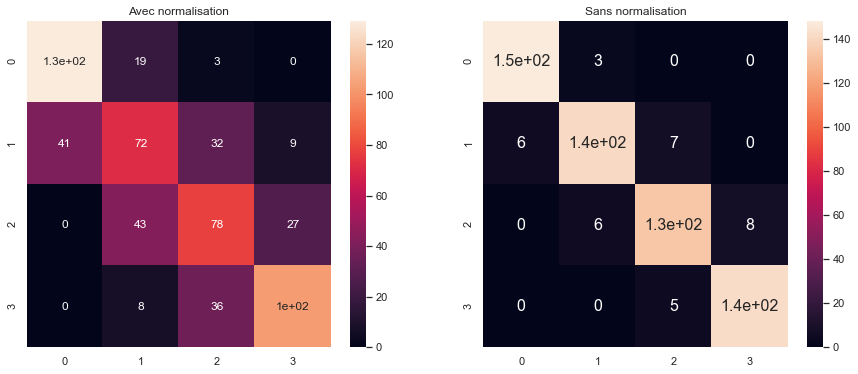

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn_scaled), annot=True)
plt.title("Avec normalisation")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 16})
plt.title("Sans normalisation")
plt.show()

##### 2. Random Forrest
Etant donné que c'est un modèle basé sur les arbres de décision, il n'a pas besoin de normalisation des données pour bien fonctionner

In [18]:
forrest = RandomForestClassifier(n_estimators = 250, max_features = 'sqrt', criterion = 'entropy').fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, forrest.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, yforrest))

Taux de précision lors de l'entrainement :  1.0
Taux de précision lors des tests :  0.8883333333333333


On a des résultats très satisfaisant aussi, on affiche la matrice de confusion pour cet algorithme aussi

Text(0.5, 1.0, "Matrice de confusion avec l'algorithme Random Forrest")

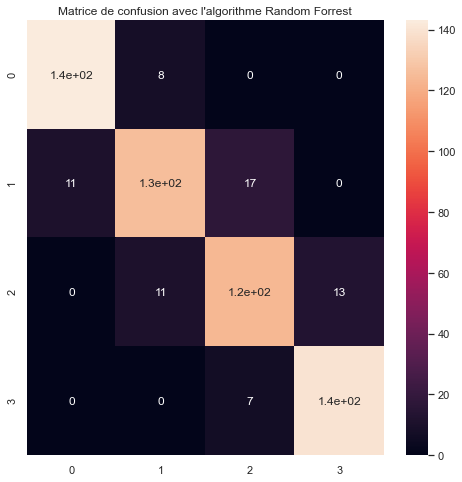

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True)
plt.title("Matrice de confusion avec l'algorithme Random Forrest")

##### 3. Decision Tree
On voit si un seul arbre peut suffir pour la classification efficace de ce dataset

In [39]:
dTree = tree.DecisionTreeClassifier(random_state=0, criterion='entropy').fit(fv_train,etiq_train)
ydTree = dTree.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, dTree.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ydTree))

Taux de précision lors de l'entrainement :  1.0
Taux de précision lors des tests :  0.8533333333333334


On voit bien que le Random Forrest améliore légèrement le modèle, mais clairement, avec un seul arbre de décision on a déjà de très bons résultats avec un 85.33% de précision. On affiche l'abre de décision pour parvenir à cette décision

Text(0.5, 1.0, 'Arbre de décision permettant la classification des téléphones')

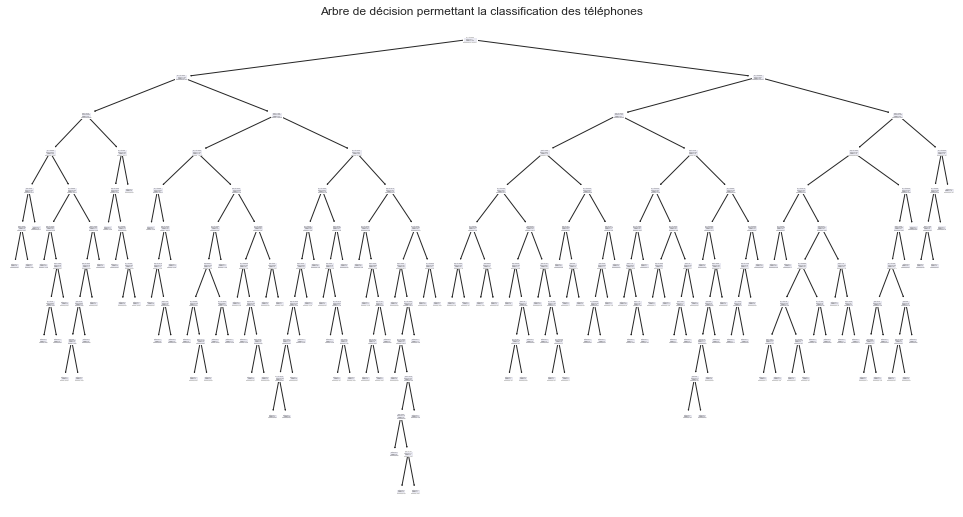

In [45]:
plt.figure(figsize=(17,9))
_= tree.plot_tree(dTree)
plt.title("Arbre de décision permettant la classification des téléphones")

##### 4. SVM 
On va tester ici avec et sans normalisation pour voir l'impact de la normalisation sur la qualité de classification

In [20]:
# Normalisé
parameters = {'degree':np.arange(1,20,1)}
svm_scaled=SVC(gamma='scale')
clf = GridSearchCV(svm_scaled, parameters)
clf.fit(fv_train_scaled,etiq_train)

svm_scaled=SVC(**clf.best_params_)
svm_scaled.fit(fv_train_scaled,etiq_train)

ysvm_scaled=svm_scaled.predict(fv_test_scaled)

svm=SVC(gamma = 'scale')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train,etiq_train)

svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)

ysvm=svm.predict(fv_test)

print("Matrice de confusion avec normalisation : \n",metrics.confusion_matrix(etiq_test, ysvm_scaled))
print("Matrice de confusion sans normalisation : \n",metrics.confusion_matrix(etiq_test, ysvm))

Matrice de confusion avec normalisation : 
 [[141  10   0   0]
 [ 11 125  18   0]
 [  0  14 125   9]
 [  0   0  11 136]]
Matrice de confusion sans normalisation : 
 [[148   3   0   0]
 [  5 143   6   0]
 [  0   3 138   7]
 [  0   0   0 147]]


In [21]:
print("Taux de précision lors de l'entrainement avec normalisation : ",metrics.accuracy_score(etiq_train, svm_scaled.predict(fv_train_scaled)))
print("Taux de précision lors des tests avec normalisation : ",metrics.accuracy_score(etiq_test, ysvm_scaled))

print("Taux de précision lors de l'entrainement sans normalisation : ",metrics.accuracy_score(etiq_train, svm.predict(fv_train)))
print("Taux de précision lors des tests sans normalisation : ",metrics.accuracy_score(etiq_test, ysvm))

Taux de précision lors de l'entrainement avec normalisation :  0.9835714285714285
Taux de précision lors des tests avec normalisation :  0.8783333333333333
Taux de précision lors de l'entrainement sans normalisation :  0.9457142857142857
Taux de précision lors des tests sans normalisation :  0.96


On voit la aussi que la normalisation avec StandardScaler a fait diminuer la précision du modèle de classification, exemple qu'elle a impacté négativement la classification, on peut en donner quelques explications : 
- Il y a plusieurs colonnes sous forme de catégories et par conséquent l'étendue de ces colonnes ne sont pas grandes et donc la normalisation avec StandardScaler. 

J'opterai pour une reformulation du projet avec un autre moyen de normalisation, ou bien en normalisant qu'une certaines colonnes pour amener toutes les variables dans un intervalle de 0 à 1.

On affiche les matrices de confusions avec et sans normalisation

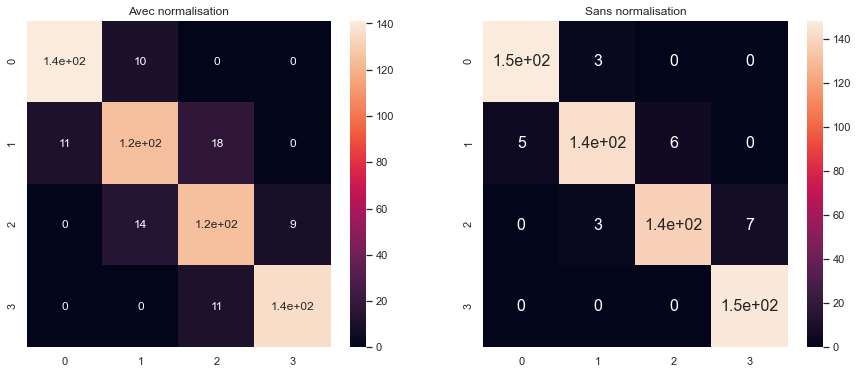

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm_scaled), annot=True)
plt.title("Avec normalisation")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 16})
plt.title("Sans normalisation")
plt.show()